In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
file_path = "produksiPadi.xlsx" 
data = pd.read_excel(file_path)

In [3]:
print(data.head())

   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [4]:
lag = 1
for i in range(1, lag + 1):
    data[f'lag_{i}'] = data['Produksi Padi(Ton)'].shift(i)

In [5]:
data = data.dropna()

In [6]:
X = data[[f'lag_{i}' for i in range(1, lag + 1)]]
y = data['Produksi Padi(Ton)'] 

### Split Ratio 70:30

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 36
Jumlah data testing: 16


### Model Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [9]:
print("\nPembagian Data:")
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Pembagian Data:
Jumlah data training: 46
Jumlah data testing: 6


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### Model Evaluate

In [12]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [13]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [14]:
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)


In [15]:
print("Evaluasi Model:")
print(f"MSE (Train): {mse_train:.4f}, MSE (Test): {mse_test:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}, RMSE (Test): {rmse_test:.4f}")
print(f"MAPE (Train): {mape_train:.4%}, MAPE (Test): {mape_test:.4%}")

Evaluasi Model:
MSE (Train): 3167409750403.4580, MSE (Test): 92734353857603.1250
RMSE (Train): 1779721.8183, RMSE (Test): 9629867.8006
MAPE (Train): 3.2425%, MAPE (Test): 8.0716%


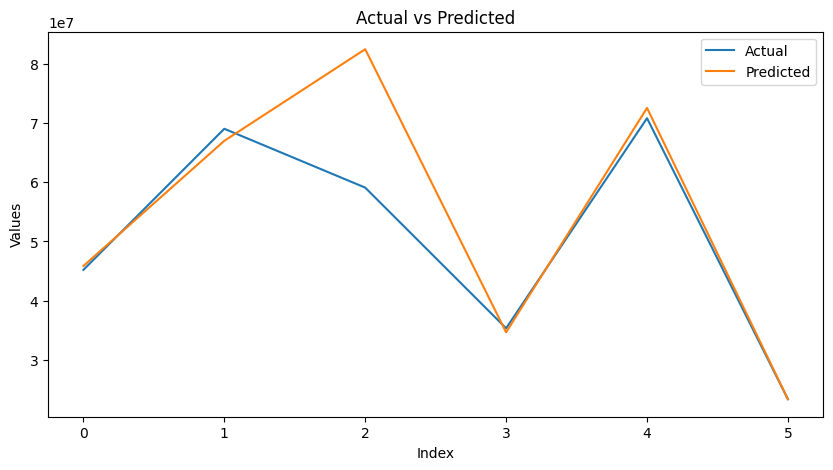

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_test, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

### Prediksi 2023 & 2024

In [17]:
print("\nDataset terakhir:")
print(data.tail())


Dataset terakhir:
    Tahun  Produksi Padi(Ton)        lag_1
48   2018         59101577.84  81148617.00
49   2019         54604033.34  59101577.84
50   2020         54649202.24  54604033.34
51   2021         53802637.44  54649202.24
52   2022         54338410.44  53802637.44


In [18]:
tahun_baru = [2023, 2024]
data_prediksi = pd.DataFrame({'Tahun': tahun_baru})

In [19]:
lag_columns = [f'lag_{i}' for i in range(1, lag + 1)]

In [20]:
last_values = data['Produksi Padi(Ton)'].iloc[-lag:].values[::-1]

In [21]:
for i, lag_col in enumerate(lag_columns):
    if i < len(last_values):
        data_prediksi[lag_col] = last_values[i]

In [22]:
data_prediksi = data_prediksi.fillna(0) 

In [23]:
print("\nData untuk prediksi:")
print(data_prediksi)


Data untuk prediksi:
   Tahun        lag_1
0   2023  54338410.44
1   2024  54338410.44


In [24]:
X_pred = data_prediksi[lag_columns]
y_pred = model.predict(X_pred)

In [25]:
data_prediksi['Produksi Padi(Ton)'] = y_pred

In [26]:
print("\nHasil Prediksi untuk Tahun 2023 dan 2024:")
print(data_prediksi[['Tahun', 'Produksi Padi(Ton)']])


Hasil Prediksi untuk Tahun 2023 dan 2024:
   Tahun  Produksi Padi(Ton)
0   2023        5.552066e+07
1   2024        5.552066e+07
